# The Standard Normal Distribution

In statistical analysis, we use probability to describe how likely a particular result (e.g. a sample mean) is relative to something else (e.g. the population mean). To do this, we will return to the concept of distributions. Many climate and geophysical variables have distributions with similar characteristics, so in this course, we will focus on this type of distribution, the **normal distribution**.

## Probability Density Functions

In the previous section on distributions, we used histograms to visualize the *discrete* probability distributions of surface air temperature data at the UTSC weather station. However, most variables that we will be working with are not discrete, they are *continuous*, and thus, we need a way to describe continuous probability distributions (see the [following][pdf] for more on discrete versus continuous probability distributions).

Let's define a *probability density function* (PDF), a function that describes a probability distribution for a continuous variable, as $f(x)$.

The probability of an event $x$ occurring between values $a$ and $b$ is then,

$$
Pr(a \leq x \leq b) = \int_{a}^b f(x)dx
$$

where $f(x)$ is the **PDF** and has the following properties:

- $f(x) \geq 0$ for all $x$
- $\int_{-\infty}^{\infty} f(x)dx = 1$

Note the similarities between the relative frequency plotted in our histograms and the PDF, both are always greater than or equal to zero and the area under both curves sums to 1 (Note that for our histograms, an unstated assumption was that each bin had a width of 1).

### Cumulative Density Functions

The **cumulative density function** (CDF) is analogous to the *discrete* cumulative probability distribution. The CDF at value $b$, denoted $F(b)$, is the probability that $x$ assumes a value less than $b$

$$
\begin{align}
Pr(x \leq b) &= F(b)
&= \int_{-\infty}^{b} f(x)dx
\end{align}
$$

So, for all $a$ $\leq$ $b$, we can show that

$$
Pr(a \leq x \leq b) = F(b) - F(a)
$$

## The Normal Distribution

So far, we have described probability density functions in general terms. Now, we will take a closer look at the **normal distribution**. 

The PDF of a variable $x$ that is *normally* distributed about its mean value is given by

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

where $\mu$ is the population mean and $\sigma$ is the population standard deviation (as before).

The associated cumulative distribution function is

$$
F(b) = \int_{-\infty}^{b} \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}dx
$$

and the probability that $x$ will fall between two values $a$ and $b$ is thus

$$
F(b) - F(a) = \int_{a}^{b} \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}dx
$$

Let's take a look at these functions for a given set of parameters. To make it easy on ourselves, we will use a python function that randomly samples from a normal distribution.


[pdf]: https://www.themathdoctors.org/from-histograms-to-probability-distribution-functions/


In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16) #set default font size and weight for plots
from IPython import display
import time

In [2]:
# draw random values from a normal distribution (mean = 0 and standard deviation = 1)
mu = 0
sigma = 1

x = np.random.normal(mu, sigma, size = 5000) # sample size of 1000

We can now plug the values for $x$ into our function and plot the normal distribution for $x$.

In [3]:
# first sort x so that it monotonically increases
x = np.sort(x)
# write down the function for the PDF
f = (1 / (sigma * np.sqrt(2*np.pi))) * np.e**(-((x - mu)**2)/(2*sigma**2))

Let's also compute the histogram for comparison.

In [4]:
xinc = np.arange(-3,3,.25) # increments denote the bin size
hx = np.histogram(x,xinc)

(-3.0, 3.0)

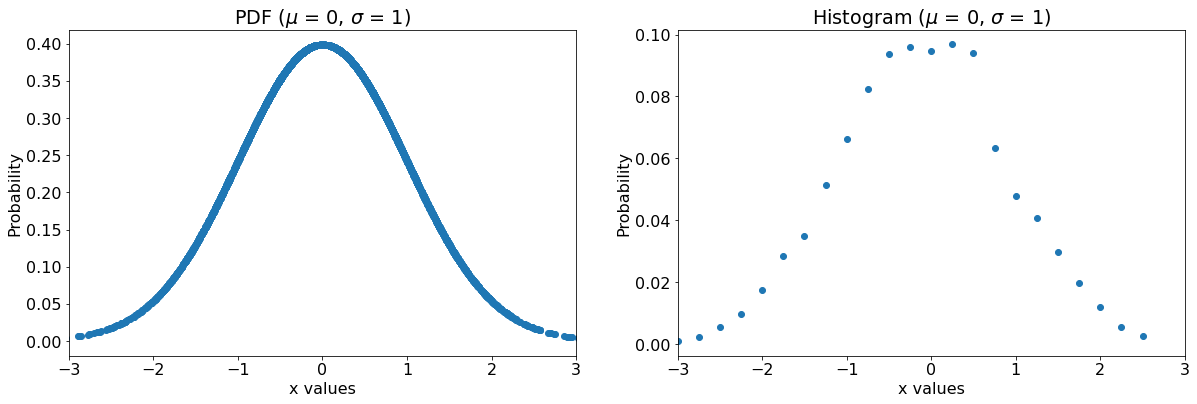

In [5]:
plt.figure(figsize=(20,6))

# PDF
plt.subplot(1,2,1)
plt.scatter(x,f)

# add labels
plt.xlabel('x values')
plt.ylabel('Probability')
plt.title('PDF ($\mu$ = 0, $\sigma$ = 1)')
plt.xlim(-3,3)

# histogram
plt.subplot(1,2,2)
plt.scatter(hx[1][:-1],hx[0]/np.size(x))

# add labels
plt.xlabel('x values')
plt.ylabel('Probability')
plt.title('Histogram ($\mu$ = 0, $\sigma$ = 1)')
plt.xlim(-3,3)

The normal distribution is often described as a *bell curve* due to its bell shape, as we can clearly see here.

Note that the y-axes are different because the histogram has discrete bin sizes. If we plot the continuous and discrete cumulative distributions, we can overcome this bin size issue. We will import a scipy package to help us with the integration.

In [6]:
# import integration package
import scipy.integrate as integrate

# integrate f as a function of x
F = integrate.cumtrapz(f,x) #the cumtrapz integration algorithm is what we want

# cumulatively sum the histogram (as we have done previously)
hxx = np.cumsum(hx[0])

(-3.0, 3.0)

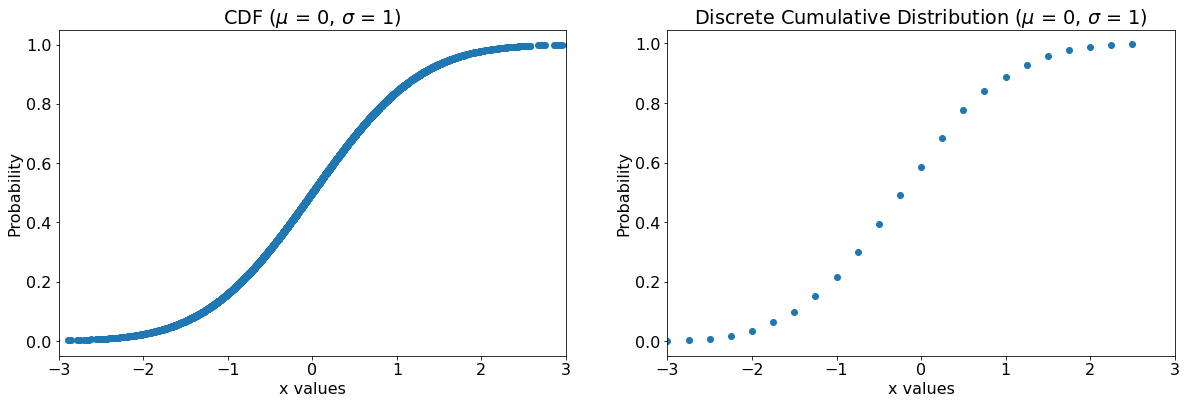

In [7]:
plt.figure(figsize=(20,6))

# CDF
plt.subplot(1,2,1)
plt.scatter(x[:-1],F)

# add labels
plt.xlabel('x values')
plt.ylabel('Probability')
plt.title('CDF ($\mu$ = 0, $\sigma$ = 1)')
plt.xlim(-3,3)

# discrete cumulative distribution
plt.subplot(1,2,2)
plt.scatter(hx[1][:-1],hxx/np.size(x))

# add labels
plt.xlabel('x values')
plt.ylabel('Probability')
plt.title('Discrete Cumulative Distribution ($\mu$ = 0, $\sigma$ = 1)')
plt.xlim(-3,3)

### The *Standard* Normal Distribution

The form of the normal distribution that we will use most often is the **standard normal** distribution. The standard normal distribution arises when one *standardizes* a normally distributed variable $x$.

Standardization involves subtracting the mean and dividing by the standard deviation. We will denote the standardized version of $x$ as

$$
z = \frac{x - \mu}{\sigma}
$$

Thus, the mean of $z$ is zero and the standard deviation is 1. This is the case that we just examined above. So, if $z$ has a value of 1, it has a value that is one standard deviation above the mean.

$z$ is sometimes called the *$z$-score* or the *$z$-statistic*.

Using $z$, we can rewrite the function for the PDF of the standard normal distribution:

$$
f(z) = \frac{1}{\sqrt{2\pi}}e^{\frac{-z^2}{2}}
$$

Using the standard normal distribution, we can assess the probability that $z$ falls within a certain range. [Figure 6](stdnorm) illustrates some examples of this

```{figure} stdnorm.png
---
scale: 65%
name: stdnorm
---
[Examples](https://mathsisfun.com/data/standard-normal-distribution.html) of probability ranges for the standard normal distribution.
```

Let's take a look at how to do this in the next section.